State matrix:
 [[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]
State vector:
 [0 0 0 0 0 0 0 0 0 1]
System after 1 step:
 [0 0 0 0 0 0 0 1 0 0]


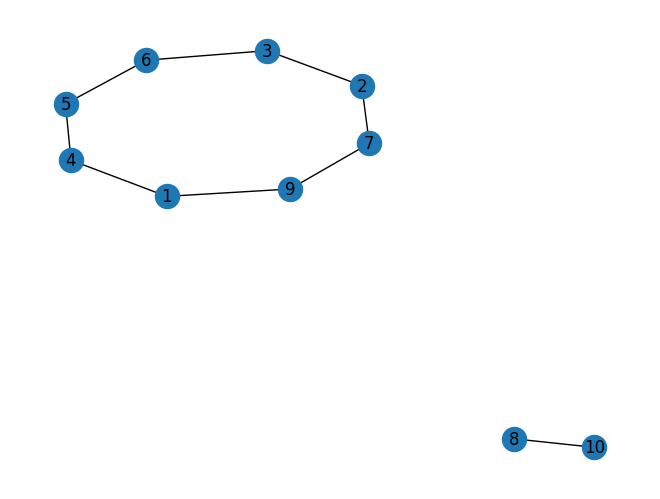

In [456]:
import numpy as np
from numpy.linalg import matrix_power
import networkx as nx
# 13 variantas
# 1 task
stateMatrix = np.array([
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0]])

stateVector = np.array([0,0,0,0,0,0,0,0,0,1])

def systemAfterTime(stateMatrix: np.array, stateVector: np.array, steps: int):
    matrixToPower = matrix_power(stateMatrix, steps)
    return matrixToPower.dot(stateVector)

print("State matrix:\n", stateMatrix)

print("State vector:\n", stateVector)

print("System after 1 step:\n", systemAfterTime(stateMatrix, stateVector, 1))

G = nx.Graph()
# Add nodes and edges
G.add_edge("1", "9")
G.add_edge("2","3")
G.add_edge("3","6")
G.add_edge("4","1")
G.add_edge("5","4")
G.add_edge("6","5")
G.add_edge("7","2")
G.add_edge("8","10")
G.add_edge("9","7")
G.add_edge("10","8")

nx.draw(G, with_labels=True)


In [457]:
# 2 task
# https://www.mathworks.com/matlabcentral/fileexchange/12267-fast-algorithm-for-generating-doubly-stochasstic-matrices
import random
import numpy as np
from math import isclose

def checkIfDoublyStochastic(matrix: np.ndarray) -> bool:
    for i in range(matrix.shape[0]):
        if not isclose(matrix[i-1].sum(),1, abs_tol=1e-8) or not isclose(matrix[:,i-1].sum(),1, abs_tol=1e-8):
            return False
    return True


def systemAfterTime(stateMatrix: np.array, stateVector: np.array, steps: int) -> np.array:
    matrixToPower = matrix_power(stateMatrix, steps)
    return matrixToPower.dot(stateVector)

def doublyStochasticMatrix(n: int) -> np.ndarray:
    matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            matrix[i,j] = 1/n

    for _ in range(n ** 4):
        i1 = np.random.randint(0,n)
        i2 = np.random.randint(0,n)
        j1 = np.random.randint(0,n)
        j2 = np.random.randint(0,n)
        d = random.uniform(0, min(matrix[i1,j1], matrix[i2,j2]))
        matrix[i1,j1] -= d
        matrix[i2,j2] -= d
        matrix[i1,j2] += d
        matrix[i2,j1] += d

    return matrix
matrix = doublyStochasticMatrix(5)
print("Doubly stochastic matrix:\n", matrix)
print("Is doubly stochastic matrix:\n", checkIfDoublyStochastic(matrix))
state = np.array([0,0,0,0,1])
print("\nState vector:\n", state)
print("System after 1 step:\n", systemAfterTime(matrix, state, 1))
print("System after 2 steps:\n", systemAfterTime(matrix, state, 2))
print("System after -2 steps:\n", systemAfterTime(matrix, state, -2))



Doubly stochastic matrix:
 [[1.33864696e-04 1.41846130e-01 2.34159498e-01 4.01902697e-01
  2.21957811e-01]
 [5.47069307e-01 1.57945427e-01 2.30128177e-03 8.76326146e-02
  2.05051370e-01]
 [1.08585016e-01 5.14240848e-02 1.61421663e-01 2.14152332e-01
  4.64416904e-01]
 [1.82444528e-02 3.17388470e-01 5.68549841e-01 9.57739600e-02
  4.32766901e-05]
 [3.25967359e-01 3.31395889e-01 3.35677165e-02 2.00538397e-01
  1.08530638e-01]]
Is doubly stochastic matrix:
 True

State vector:
 [0 0 0 0 1]
System after 1 step:
 [2.21957811e-01 2.05051370e-01 4.64416904e-01 4.32766901e-05
 1.08530638e-01]
System after 2 steps:
 [0.1619697  0.17714013 0.16002555 0.33318344 0.16768118]
System after -2 steps:
 [ 16.57570875 -11.5309108    3.60892915   3.77410524 -11.42783233]


In [458]:
# QR decomposition
import numpy as np
import math 

def proj(u:np.array, v:np.array) -> np.array:
    return u * (np.vdot(u,v)/np.vdot(u,u))

def gramSchmidt(vectors:[np.array]) -> [np.array]:
    result = []
    normalizedVectors = []
    for i in range(len(vectors)):
        u = vectors[i].copy()
        for j in range(i):
            u = u - proj(result[j],vectors[i])
        result.append(u)
        norm = 0 + 0j
        for j in range(len(u)):
            norm += u[j] * u[j].conjugate()
        normalizedVectors.append(u / math.sqrt(np.real(norm)))
    return normalizedVectors

def QRdecomposition(matrix: np.ndarray) -> (np.ndarray, np.ndarray):
    split = np.hsplit(matrix, matrix.shape[1])
    normalizedVectors = gramSchmidt(split)
    aValues = []
    for i in range(len(normalizedVectors)):
        aValues.append(np.dot(normalizedVectors[i].T.conjugate(), split[i]) * normalizedVectors[i])

    Q = np.concatenate(normalizedVectors, axis=1)
    R = np.zeros((matrix.shape[0], matrix.shape[1]), dtype=complex)
    for i in range(len(aValues)):
        for j in range(len(aValues)):
            if i <= j:
                R[i,j] = np.dot(normalizedVectors[i].T.conjugate(), split[j])
        
    return Q,R

In [516]:
# task 3
import numpy as np
import random

interval = 10
def generateQuantumMatrix(n: int):
    matrix = np.zeros((n,n),dtype=complex)
    for i in range(n):
        for j in range(n):
            realNumber = random.uniform(-interval,interval)
            complexNumber = random.uniform(-interval,interval)
            matrix[i,j] = complex(realNumber, complexNumber)
    matrix = matrix / np.linalg.norm(matrix)
    Q,R = QRdecomposition(matrix)

    # print("Q:\n", Q)
    # print("R:\n", R)
    # print(matrix)
    # print(Q.dot(R))
    return Q

def checkIfQuantumMatrix(matrix: np.ndarray) -> bool:
    squaredMatrix = np.zeros(matrix.shape)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[0]):
            squaredMatrix[i,j] = np.real(matrix[i,j] * matrix[i,j].conjugate())

    for i in range(squaredMatrix.shape[0]):
        if not isclose(squaredMatrix[i-1].sum(),1, abs_tol=1e-8) or not isclose(squaredMatrix[:,i-1].sum(),1, abs_tol=1e-8):
            return False
    return True
        
def systemAfterTime(stateMatrix: np.array, stateVector: np.array, steps: int) -> np.array:
    matrixToPower = matrix_power(stateMatrix, steps)
    return matrixToPower.dot(stateVector)

def probabilityToBeInState(stateMatrix: np.array, steps: int, state: int, initialState:int) -> float:
    stateVector = np.zeros(stateMatrix.shape[0])
    stateVector[initialState] = 1
    matrixToPower = matrix_power(stateMatrix, steps)
    stateNSteps = matrixToPower.dot(stateVector)[state] 
    return stateNSteps * stateNSteps.conjugate()

matrixSize = 5
matrix = generateQuantumMatrix(matrixSize)
print("Random matrix:\n", np.around(matrix,3))# use around to print less digits
print("Is quantum matrix:\n", checkIfQuantumMatrix(matrix))
state = np.zeros(matrixSize)

state[-1] = 1
print("\nState vector:\n", state)
print("System after 1 step:\n", systemAfterTime(matrix, state, 1))
print("System after 2 steps:\n", systemAfterTime(matrix, state, 2))
print("System after -2 steps:\n", systemAfterTime(matrix, state, -2))
print("Probability to be in state 0 after 1 step:\n", probabilityToBeInState(matrix, 1, 0, 4))

Random matrix:
 [[-0.017-0.332j  0.109+0.415j  0.253+0.109j  0.262+0.674j -0.321-0.061j]
 [-0.22 +0.463j -0.045+0.734j  0.048-0.195j -0.063-0.275j -0.146-0.234j]
 [-0.434+0.456j -0.113-0.344j -0.267+0.214j -0.042+0.279j -0.524+0.034j]
 [-0.304-0.161j  0.031+0.019j  0.526+0.004j -0.55 -0.118j -0.161+0.511j]
 [-0.045+0.33j   0.299-0.232j  0.606+0.349j  0.028+0.032j  0.233-0.448j]]
Is quantum matrix:
 True

State vector:
 [0. 0. 0. 0. 1.]
System after 1 step:
 [-0.32130027-0.06056414j -0.1462325 -0.23428507j -0.52370042+0.03373864j
 -0.16051319+0.51102976j  0.23275745-0.447585j  ]
System after 2 steps:
 [-0.55809467+0.12832418j  0.27070391-0.1057504j  -0.0069321 +0.01116865j
  0.15245668+0.00505497j -0.55971875-0.50087226j]
System after -2 steps:
 [-0.13668907-0.40668574j  0.03277881+0.1869905j  -0.00318854+0.12730964j
 -0.4308854 -0.11766339j -0.55971875+0.50087226j]
Probability to be in state 0 after 1 step:
 (0.1069018791138929+0j)


/var/folders/2d/3vb6hz_s28z4y7mpqyhs8nbw0000gq/T/ipykernel_58536/1454505961.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  normalizedVectors.append(u / math.sqrt(np.real(norm)))
/var/folders/2d/3vb6hz_s28z4y7mpqyhs8nbw0000gq/T/ipykernel_58536/1454505961.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[i,j] = np.dot(normalizedVectors[i].T.conjugate(), split[j])


In [477]:
# 4 task
# | \phi \rangle |\phi>
phi = np.array([-6-5j,
                1+2j,
                1+2j,
                -3+6j,
                -1+2j,
                5-3j,
                5-6j,
                -4-8j], dtype=complex)
print(np.real(np.vdot(phi,phi))) # since this vector is not normalized, we need to do that


phiNorm = phi / np.linalg.norm(phi)
print("phi:\n", phiNorm)
print("phi:\n", np.real(np.vdot(phiNorm,phiNorm)))
totalProb = 0
for i in phiNorm:
    print("Value:", i)
    probability = np.real(i.conjugate()* i)
    totalProb += probability
    print("probability: ", probability)

print(totalProb)

296.0
phi:
 [-0.34874292-0.2906191j   0.05812382+0.11624764j  0.05812382+0.11624764j
 -0.17437146+0.34874292j -0.05812382+0.11624764j  0.2906191 -0.17437146j
  0.2906191 -0.34874292j -0.23249528-0.46499055j]
phi:
 1.0000000000000002
Value: (-0.34874291623145787-0.29061909685954823j)
probability:  0.2060810810810811
Value: (0.05812381937190964+0.11624763874381928j)
probability:  0.016891891891891893
Value: (0.05812381937190964+0.11624763874381928j)
probability:  0.016891891891891893
Value: (-0.17437145811572893+0.34874291623145787j)
probability:  0.15202702702702706
Value: (-0.05812381937190964+0.11624763874381928j)
probability:  0.016891891891891893
Value: (0.29061909685954823-0.17437145811572893j)
probability:  0.11486486486486489
Value: (0.29061909685954823-0.34874291623145787j)
probability:  0.2060810810810811
Value: (-0.23249527748763857-0.46499055497527714j)
probability:  0.2702702702702703
1.0


In [517]:
# 5 task
fi = np.array ([-2+3j,
                6j,
                7j,
                -8+4j,
                -8-6j,
                4+2j,
                -7,2j])

print(np.vdot(fi,fi))
fiNorm = fi / np.linalg.norm(fi)
print(fiNorm)
transitionAmplitude = np.vdot(fiNorm.conjugate(),phiNorm)

print("norm: ", np.real(np.vdot(fiNorm,fiNorm)))

print("transition amplitude: <fi|phi> ", transitionAmplitude)
print("prob", np.real(transitionAmplitude * transitionAmplitude.conjugate()))


(351+0j)
[-0.1067521 +0.16012815j  0.        +0.32025631j  0.        +0.37363236j
 -0.42700841+0.21350421j -0.42700841-0.32025631j  0.21350421+0.1067521j
 -0.37363236+0.j          0.        +0.1067521j ]
norm:  1.0000000000000002
transition amplitude: <fi|phi>  (0.08686775895582635-0.10237985876936677j)
prob 0.018027643027643037


In [520]:
# 6 task
# Parašykite kodą, kuris randa dviejų operatorių (matricų)  komutatorių.

def commutator(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    return star(A,B) - star(B,A)

def star(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    return A.dot(B)

omega1 = np.array([[1,-1-1j],
                  [-1+1j,1]],dtype=complex)
print("omega:\n", omega1)

omega2 = np.array([[0,-1],
                   [-1,2]],dtype=complex)


print("omega:\n", omega2)
print("star", star(omega1,omega2))
print("star", star(omega2,omega1))
print("commutator", commutator(omega1,omega2))

Sx = np.array([[0,1],
                [1,0]],dtype=complex)
Sy = np.array([[0,-1j],
                [1j,0]],dtype=complex)
Sz = np.array([[1,0],
                [0,-1]],dtype=complex)

print("commutato\n", commutator(Sx,Sy))
print("commutator\n", commutator(Sy,Sz))
print("commutator\n", commutator(Sz,Sx))


omega:
 [[ 1.+0.j -1.-1.j]
 [-1.+1.j  1.+0.j]]
omega:
 [[ 0.+0.j -1.+0.j]
 [-1.+0.j  2.+0.j]]
star [[ 1.+1.j -3.-2.j]
 [-1.+0.j  3.-1.j]]
star [[ 1.-1.j -1.+0.j]
 [-3.+2.j  3.+1.j]]
commutator [[ 0.+2.j -2.-2.j]
 [ 2.-2.j  0.-2.j]]
commutato
 [[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]
commutator
 [[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]]
commutator
 [[ 0.+0.j  2.+0.j]
 [-2.+0.j  0.+0.j]]


In [546]:
# 7 tas
# Parašykite kodą, kuris randa Ermito operatoriaus $\Omega$ tam tikros būsenos $\psi$ vidurkį ir dispersiją.

def average(omega: np.ndarray, psi: np.array) -> float:
    omegaPsi = omega.dot(psi.transpose())
    mean = omegaPsi.conjugate().dot(psi)
    return mean.real

def variance(omega:np.ndarray, psi: np.array) -> float:
    mean = average(omega,psi)
    deltaOmegaPsi = omega - np.eye(omega.shape[0],dtype=complex)* mean
    dOPSquared = deltaOmegaPsi.dot(deltaOmegaPsi)
    variance = average(dOPSquared,psi)
    return variance.real

omega = np.array([[1,-1j],
                    [1j,2]],dtype=complex)

psi = np.array([math.sqrt(2)/2,(math.sqrt(2)/2)*1j],dtype=complex)
print("average: ", average(omega,psi))
print("variance: ",variance(omega,psi))

average:  2.5000000000000004
variance:  0.25


In [561]:
# 8 task 
# Sugalvokite kokią nors unitarinę 4x4 matricą,
# kurios elementai priklauso nuo tam tikro parametro  𝑡 . 
# Tarkime, kad laikas yra diskretus, t.y.  𝑡=0,1,2,3,...  
# Pradiniu laiko omentu sistema yra būsenoje  𝜓 .Parašykite, kuris randa jos būseną nurodytu laiko momentu  𝑇 .

unitaryMatrix = np.array([[0,1,0,0],
                            [0,0,1,0],
                            [0,0,0,1],
                            [1,0,0,0]],dtype=complex)

psi = np.array([1,0,0,0],dtype=complex)
print("psi:\n", psi)
print("unitary matrix:\n", unitaryMatrix)



def dynamics(initialStates:np.array, timeUnits: int, unitaryMatrix: np.ndarray):# normalizuotos versijos turi sutapti
    numberOfPoint = initialStates.shape[0]
    print(initialStates)
    for i in range(timeUnits):
        initialStates = unitaryMatrix.dot(initialStates)
        print("after "+i.__str__() + " unitary matrix, states:\n"+initialStates.__str__(),"\n")
    print("finished timeUnits:\n",initialStates,"\n")
    printingData(initialStates,numberOfPoint)
    for i in range(timeUnits):
        initialStates = unitaryMatrix.conjugate().dot(initialStates)
        print("after "+i.__str__() + " unitary matrix dagger, states:\n"+initialStates.__str__(),"\n")
    print("reverted back to initialStates\n", initialStates)

def printingData(state:np.array, numberOfPoints:int):
    normOfStates = state.conjugate().dot(state)
    for i in range(numberOfPoints):
        print ("Probability of being at point " + i.__str__() + " is " + (state[i].conjugate() * state[i] / normOfStates ** 2).real.__str__())


dynamics(psi, 3, unitaryMatrix)


psi:
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
unitary matrix:
 [[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
after 0 unitary matrix, states:
[0.+0.j 0.+0.j 0.+0.j 1.+0.j] 

after 1 unitary matrix, states:
[0.+0.j 0.+0.j 1.+0.j 0.+0.j] 

after 2 unitary matrix, states:
[0.+0.j 1.+0.j 0.+0.j 0.+0.j] 

finished timeUnits:
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j] 

Probability of being at point 0 is 0.0
Probability of being at point 1 is 1.0
Probability of being at point 2 is 0.0
Probability of being at point 3 is 0.0
after 0 unitary matrix dagger, states:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j] 

after 1 unitary matrix dagger, states:
[0.+0.j 0.+0.j 0.+0.j 1.+0.j] 

after 2 unitary matrix dagger, states:
[0.+0.j 0.+0.j 1.+0.j 0.+0.j] 

reverted back to initialStates
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
